In [2]:
from functions.correlation_maps import simpleCorrelationMap, correlationMap_1D_v3, correlationMap_2D_v3#, correlationMap_2D, correlationMap_1D,
from functions.loading_and_processing_data import loadMITgcmData, loadTimeSeriesData
from functions.other_functions import computeBuoyancy
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
total=loadTimeSeriesData(filename='timeseries_final', members='all', kind='old')

Loading number:0
../data/timeseries_final_PACE01.nc
Loading number:1
../data/timeseries_final_PACE02.nc
Loading number:2
../data/timeseries_final_PACE03.nc
Loading number:3
../data/timeseries_final_PACE04.nc
Loading number:4
../data/timeseries_final_PACE05.nc
Loading number:5
../data/timeseries_final_PACE06.nc
Loading number:6
../data/timeseries_final_PACE07.nc
Loading number:7
../data/timeseries_final_PACE08.nc
Loading number:8
../data/timeseries_final_PACE09.nc
Loading number:9
../data/timeseries_final_PACE10.nc
Loading number:10
../data/timeseries_final_PACE11.nc
Loading number:11
../data/timeseries_final_PACE12.nc
Loading number:12
../data/timeseries_final_PACE13.nc
Loading number:13
../data/timeseries_final_PACE14.nc
Loading number:14
../data/timeseries_final_PACE15.nc
Loading number:15
../data/timeseries_final_PACE16.nc
Loading number:16
../data/timeseries_final_PACE17.nc
Loading number:17
../data/timeseries_final_PACE18.nc
Loading number:18
../data/timeseries_final_PACE19.nc
Loa

In [ ]:
pl

In [7]:
from functions.other_functions import computeBuoyancy
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from functions.loading_and_processing_data import loadMITgcmData, loadPACEData, detrend_and_average_MITgcmData, read_all_data, loadTimeSeriesData

import sys
sys.path.append('/data/hpcdata/users/grejan/mitgcm/') #Make sure we can also import Kaitlins code.
from mitgcm_python_master.grid import ERA5Grid, PACEGrid, Grid, dA_from_latlon, pierre_obs_grid

In [8]:
gp='/data/oceans_output/shelf/kaight/mitgcm/PAS_grid/'
grid = Grid(gp)

/users/kaight/MITgcm/utils/python/MITgcmutils/MITgcmutils/netcdf.py:330: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if hasattr(self, 'mode') and self.mode is 'w':
/users/kaight/MITgcm/utils/python/MITgcmutils/MITgcmutils/netcdf.py:705: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if typecode is not 'c':


In [4]:
dataU=loadMITgcmData(filename='bottom100m_averaged_UVEL', members=[0,3], kind='old')
dataV=loadMITgcmData(filename='bottom100m_averaged_VVEL', members=[0,3], kind='old')
melt=loadTimeSeriesData(filename='timeseries_final', members=[0,3], kind='old')['dotson_to_cosgrove_massloss']

Loading number:0
../data/bottom100m_averaged_UVEL_ens1.nc
Loading number:1
../data/bottom100m_averaged_UVEL_ens2.nc
Loading number:2
../data/bottom100m_averaged_UVEL_ens3.nc
Loading number:0
../data/bottom100m_averaged_VVEL_ens1.nc
Loading number:1
../data/bottom100m_averaged_VVEL_ens2.nc
Loading number:2
../data/bottom100m_averaged_VVEL_ens3.nc
Loading number:0
../data/timeseries_final_PACE01.nc
Loading number:1
../data/timeseries_final_PACE02.nc
Loading number:2
../data/timeseries_final_PACE03.nc


In [5]:
dataU1=loadMITgcmData(filename='depth_averaged_UVEL', members=[0,3], kind='old')
dataV1=loadMITgcmData(filename='depth_averaged_VVEL', members=[0,3], kind='old')
dataU=dataU-dataU1
dataV=dataV-dataV1

Loading number:0
../data/depth_averaged_UVEL_ens1.nc
Loading number:1
../data/depth_averaged_UVEL_ens2.nc
Loading number:2
../data/depth_averaged_UVEL_ens3.nc
Loading number:0
../data/depth_averaged_VVEL_ens1.nc
Loading number:1
../data/depth_averaged_VVEL_ens2.nc
Loading number:2
../data/depth_averaged_VVEL_ens3.nc


In [6]:
meltrm=melt.sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean()
umean=dataU.where(meltrm>meltrm.quantile(0.9)).mean(dim=['time', 'ens'])
vmean=dataV.where(meltrm>meltrm.quantile(0.9)).mean(dim=['time', 'ens'])

In [7]:
umean2=dataU.where(meltrm<meltrm.quantile(0.1)).mean(dim=['time', 'ens'])
vmean2=dataV.where(meltrm<meltrm.quantile(0.1)).mean(dim=['time', 'ens'])

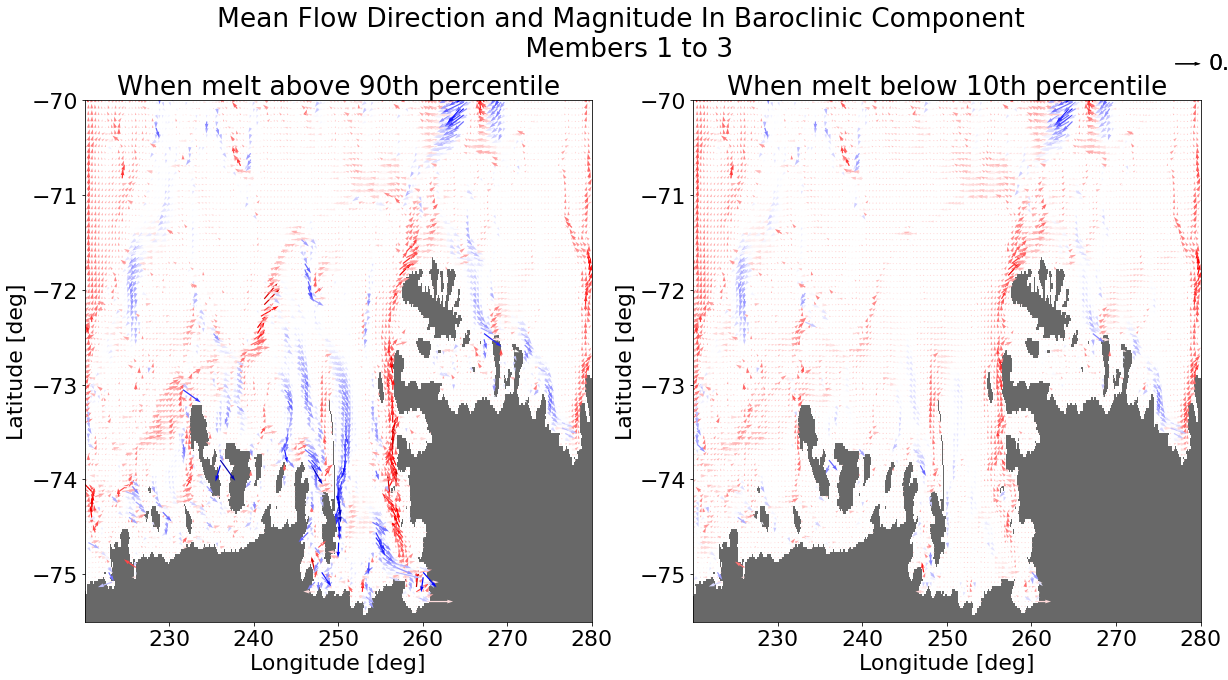

In [12]:
step1=2
step2=4
scale=2

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(20,10))
plt.suptitle('Mean Flow Direction and Magnitude In Baroclinic Component \n Members 1 to 3')
ax=plt.subplot(1,2,1)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
Q=plt.quiver(vmean.XC[::step2], umean.YC[::step1], umean['UVEL'].values[::step1, ::step2], vmean['VVEL'].values[::step1, ::step2], vmean['VVEL'].values[::step1, ::step2], scale=scale, cmap='seismic')
qk = ax.quiverkey(Q, 0.9, 0.9, 0.1, r'$0.1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
plt.title('When melt above 90th percentile')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
plt.ylim([-75.5, -70])

ax=plt.subplot(1,2,2)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
Q=plt.quiver(vmean2.XC[::step2], umean2.YC[::step1], umean2['UVEL'].values[::step1, ::step2], vmean2['VVEL'].values[::step1, ::step2], vmean2['VVEL'].values[::step1, ::step2], scale=scale, cmap='seismic')
qk = ax.quiverkey(Q, 0.9, 0.9, 0.1, r'$0.1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
plt.title('When melt below 10th percentile')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')

from datetime import date
today = date.today()
today=today.strftime("%Y%m%d")

plt.ylim([-75.5, -70])
plt.subplots_adjust(top=0.85)
plt.savefig('../03_output/other/'+today+'_mean_flow_direction_versus_melt_baroclinic_1-3.png')

# plt.subplot(2,2,2)
# plt.plot(melt.sel(time=slice('1920', '2013')).indexes['time'].to_datetimeindex(), 
#          melt.mean(dim='ens').sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean(), c='b')
# plt.grid(True)

# plt.subplot(2,2,3)
# plt.quiver(umean2.values[::step1, ::step2], vmean2.values[::step1, ::step2], vmean2.values[::step1, ::step2], scale=scale, cmap='seismic')
# plt.subplot(2,2,4)
# plt.plot(melt.sel(time=slice('1920', '2013')).indexes['time'].to_datetimeindex(), 
#          melt.mean(dim='ens').sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean(), c='b')
# plt.grid(True)

In [5]:
data=loadMITgcmData(filename='SALT_averaged_-700to-200', members=[0,3], kind='maps')
melt=loadTimeSeriesData(filename='timeseries_final', members=[0,3], kind='old')['dotson_to_cosgrove_massloss']

Loading number:0
../02_data/maps/SALT_averaged_-700to-200_ens1.nc
Loading number:1
../02_data/maps/SALT_averaged_-700to-200_ens2.nc
Loading number:2
../02_data/maps/SALT_averaged_-700to-200_ens3.nc
Loading number:0
../data/timeseries_final_PACE01.nc
Loading number:1
../data/timeseries_final_PACE02.nc
Loading number:2
../data/timeseries_final_PACE03.nc


In [7]:
meltrm=melt.sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean()
Smean1=data.where(meltrm>meltrm.quantile(0.9)).mean(dim=['time', 'ens'])
Smean2=data.where(meltrm<meltrm.quantile(0.1)).mean(dim=['time', 'ens'])

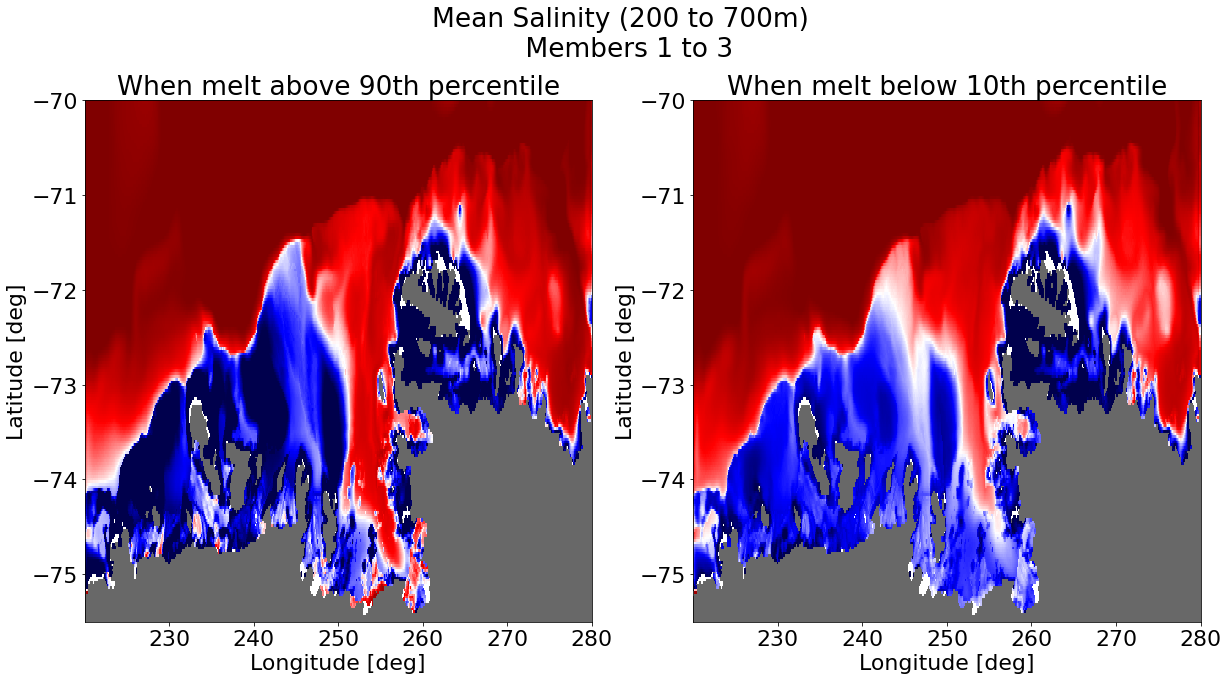

In [12]:
#step1=2
#step2=4
#scale=2

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(20,10))
plt.suptitle('Mean Salinity (200 to 700m) \n Members 1 to 3')
ax=plt.subplot(1,2,1)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)

Q=plt.pcolor(Smean1.XC, Smean1.YC, Smean1['SALT'], cmap='seismic', vmin=34.3, vmax=34.7)
#qk = ax.quiverkey(Q, 0.9, 0.9, 0.1, r'$0.1 \frac{m}{s}$', labelpos='E',
#                   coordinates='figure')
plt.title('When melt above 90th percentile')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
plt.ylim([-75.5, -70])

ax=plt.subplot(1,2,2)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
Q=plt.pcolor(Smean2.XC, Smean2.YC, Smean2['SALT'], cmap='seismic', vmin=34.3, vmax=34.7)
plt.title('When melt below 10th percentile')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')

from datetime import date
today = date.today()
today=today.strftime("%Y%m%d")

plt.ylim([-75.5, -70])
plt.subplots_adjust(top=0.85)
#plt.savefig('../03_output/other/'+today+'_mean_flow_direction_versus_melt_baroclinic_1-3.png')



In [13]:
from functions.loading_and_processing_data import loadMITgcmData, loadTimeSeriesData, detrend_and_average_MITgcmData
melt_dt=detrend_and_average_MITgcmData(melt.to_dataset(name='melt'), var='melt')
data_dt=detrend_and_average_MITgcmData(data, var='SALT')

In [14]:
meltrm=melt_dt.sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean()
Smean1=data_dt.where(meltrm>meltrm.quantile(0.9)).mean(dim=['time', 'ens'])
Smean2=data_dt.where(meltrm<meltrm.quantile(0.1)).mean(dim=['time', 'ens'])

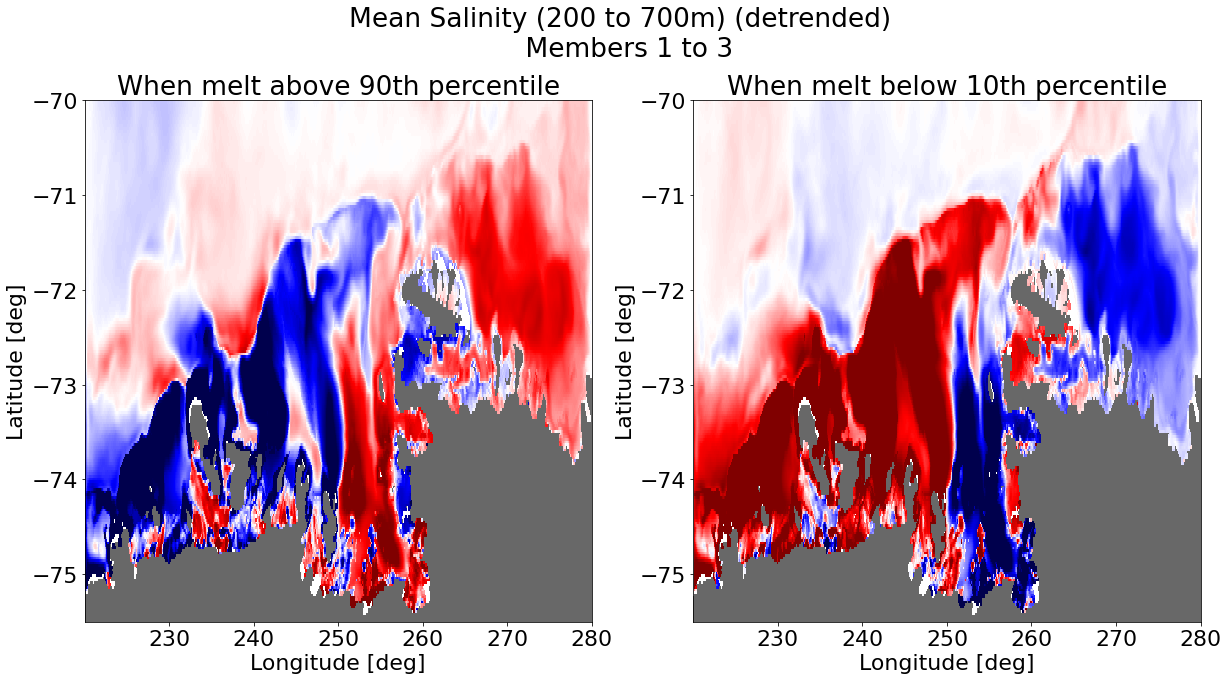

In [21]:
#step1=2
#step2=4
#scale=2

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(20,10))
plt.suptitle('Mean Salinity (200 to 700m) (detrended) \n Members 1 to 3')
ax=plt.subplot(1,2,1)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
#plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.ice_mask[grid.lat_1d<-70,:], cmap='cool', vmax=1.5)

Q=plt.pcolor(Smean1.XC, Smean1.YC, Smean1, cmap='seismic', vmin=-0.030, vmax=0.030)
#qk = ax.quiverkey(Q, 0.9, 0.9, 0.1, r'$0.1 \frac{m}{s}$', labelpos='E',
#                   coordinates='figure')
plt.title('When melt above 90th percentile')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
plt.ylim([-75.5, -70])

ax=plt.subplot(1,2,2)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
Q=plt.pcolor(Smean2.XC, Smean2.YC, Smean2, cmap='seismic', vmin=-0.030, vmax=0.030)
plt.title('When melt below 10th percentile')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')

from datetime import date
today = date.today()
today=today.strftime("%Y%m%d")

plt.ylim([-75.5, -70])
plt.subplots_adjust(top=0.85)
#plt.savefig('../03_output/other/'+today+'_mean_flow_direction_versus_melt_baroclinic_1-3.png')



In [12]:
#High melt; low melt: is flow baroclinic?
data=loadMITgcmData(filename='UVEL_W115', members=[0,5], kind='slices')
melt=loadTimeSeriesData(filename='timeseries_final', members=[0,5], kind='old')['dotson_to_cosgrove_massloss']
from functions.loading_and_processing_data import loadMITgcmData, loadTimeSeriesData, detrend_and_average_MITgcmData
melt_dt=detrend_and_average_MITgcmData(melt.to_dataset(name='melt'), var='melt', window=12)
data_dt=detrend_and_average_MITgcmData(data, var='UVEL', window=12)
meltrm=melt_dt.sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean()
Umean1=data_dt.where(meltrm>meltrm.quantile(0.9)).mean(dim=['time', 'ens'])
Umean2=data_dt.where(meltrm<meltrm.quantile(0.1)).mean(dim=['time', 'ens'])

Loading number:0
../02_data/slices/UVEL_W115_ens1.nc
Loading number:1
../02_data/slices/UVEL_W115_ens2.nc
Loading number:2
../02_data/slices/UVEL_W115_ens3.nc
Loading number:3
../02_data/slices/UVEL_W115_ens4.nc
Loading number:4
../02_data/slices/UVEL_W115_ens5.nc
Loading number:0
../data/timeseries_final_PACE01.nc
Loading number:1
../data/timeseries_final_PACE02.nc
Loading number:2
../data/timeseries_final_PACE03.nc
Loading number:3
../data/timeseries_final_PACE04.nc
Loading number:4
../data/timeseries_final_PACE05.nc


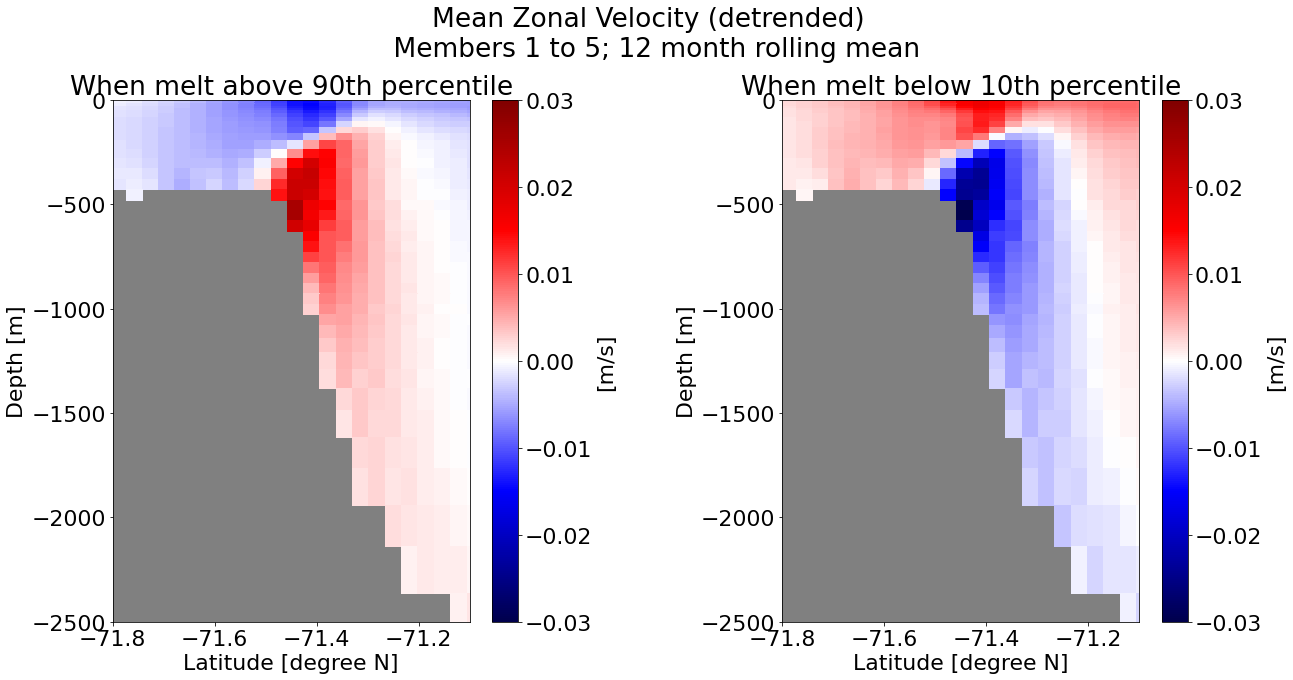

In [14]:
lon=115
Umean1=Umean1.where(Umean1!=0, drop=True)
Umean2=Umean2.where(Umean2!=0, drop=True)

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(20,10))
plt.suptitle('Mean Zonal Velocity (detrended) \n Members 1 to 5; 12 month rolling mean')
ax=plt.subplot(1,2,1)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
#plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.ice_mask[grid.lat_1d<-70,:], cmap='cool', vmax=1.5)

Q=plt.pcolor(Umean1.YC, Umean1.Z, Umean1, cmap='seismic', vmin=-0.030, vmax=0.030)
#qk = ax.quiverkey(Q, 0.9, 0.9, 0.1, r'$0.1 \frac{m}{s}$', labelpos='E',
#                   coordinates='figure')
if lon==115:
    ax.set_xlim([-71.8, -71.1])
elif lon==123:
    ax.set_xlim([-73, -72])
ax.set_ylim([-2500, 0])
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Latitude [degree N]')
ax.set_facecolor('grey')
plt.title('When melt above 90th percentile')
plt.colorbar(label='[m/s]')
#plt.ylim([-75.5, -70])

ax=plt.subplot(1,2,2)
#plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
Q=plt.pcolor(Umean2.YC, Umean2.Z, Umean2, cmap='seismic', vmin=-0.030, vmax=0.030)
plt.title('When melt below 10th percentile')
if lon==115:
    ax.set_xlim([-71.8, -71.1])
elif lon==123:
    ax.set_xlim([-73, -72])
ax.set_ylim([-2500, 0])
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Latitude [degree N]')
ax.set_facecolor('grey')
plt.colorbar(label='[m/s]')

from datetime import date
today = date.today()
today=today.strftime("%Y%m%d")

#plt.ylim([-75.5, -70])
plt.subplots_adjust(top=0.85, wspace=0.5)
#plt.savefig('../03_output/other/'+today+'_mean_flow_direction_versus_melt_baroclinic_1-3.png')



In [16]:
#High melt; low melt: is flow baroclinic?
data=loadMITgcmData(filename='SALT_W115', members=[0,5], kind='slices')
melt=loadTimeSeriesData(filename='timeseries_final', members=[0,5], kind='old')['dotson_to_cosgrove_massloss']
from functions.loading_and_processing_data import loadMITgcmData, loadTimeSeriesData, detrend_and_average_MITgcmData
melt_dt=detrend_and_average_MITgcmData(melt.to_dataset(name='melt'), var='melt')
data_dt=detrend_and_average_MITgcmData(data, var='SALT', window=12)
meltrm=melt_dt.sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean()
Smean1=data_dt.where(meltrm>meltrm.quantile(0.9)).mean(dim=['time', 'ens'])
Smean2=data_dt.where(meltrm<meltrm.quantile(0.1)).mean(dim=['time', 'ens'])

Loading number:0
../02_data/slices/SALT_W115_ens1.nc
Loading number:1
../02_data/slices/SALT_W115_ens2.nc
Loading number:2
../02_data/slices/SALT_W115_ens3.nc
Loading number:3
../02_data/slices/SALT_W115_ens4.nc
Loading number:4
../02_data/slices/SALT_W115_ens5.nc
Loading number:0
../data/timeseries_final_PACE01.nc
Loading number:1
../data/timeseries_final_PACE02.nc
Loading number:2
../data/timeseries_final_PACE03.nc
Loading number:3
../data/timeseries_final_PACE04.nc
Loading number:4
../data/timeseries_final_PACE05.nc


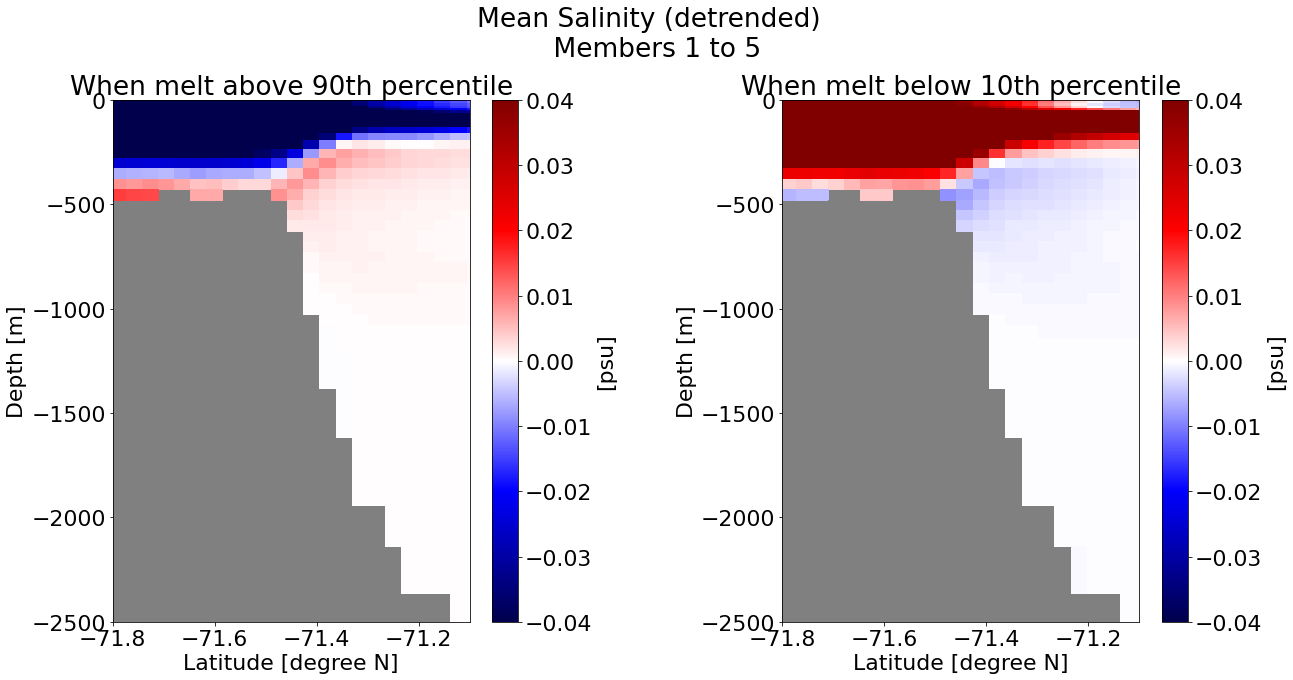

In [17]:
lon=115
Smean1=Smean1.where(Smean1!=0, drop=True)
Smean2=Smean2.where(Smean2!=0, drop=True)

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(20,10))
plt.suptitle('Mean Salinity (detrended) \n Members 1 to 5')
ax=plt.subplot(1,2,1)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
#plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.ice_mask[grid.lat_1d<-70,:], cmap='cool', vmax=1.5)

Q=plt.pcolor(Smean1.YC, Smean1.Z, Smean1, cmap='seismic', vmin=-0.040, vmax=0.040)
#qk = ax.quiverkey(Q, 0.9, 0.9, 0.1, r'$0.1 \frac{m}{s}$', labelpos='E',
#                   coordinates='figure')
if lon==115:
    ax.set_xlim([-71.8, -71.1])
elif lon==123:
    ax.set_xlim([-73, -72])
ax.set_ylim([-2500, 0])
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Latitude [degree N]')
ax.set_facecolor('grey')
plt.title('When melt above 90th percentile')
plt.colorbar(label='[psu]')
#plt.ylim([-75.5, -70])

ax=plt.subplot(1,2,2)
#plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
Q=plt.pcolor(Smean2.YC, Smean2.Z, Smean2, cmap='seismic', vmin=-0.040, vmax=0.040)
plt.title('When melt below 10th percentile')
if lon==115:
    ax.set_xlim([-71.8, -71.1])
elif lon==123:
    ax.set_xlim([-73, -72])
ax.set_ylim([-2500, 0])
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Latitude [degree N]')
ax.set_facecolor('grey')
plt.colorbar(label='[psu]')

from datetime import date
today = date.today()
today=today.strftime("%Y%m%d")

#plt.ylim([-75.5, -70])
plt.subplots_adjust(top=0.85, wspace=0.5)
#plt.savefig('../03_output/other/'+today+'_mean_flow_direction_versus_melt_baroclinic_1-3.png')



In [40]:
#High melt; low melt: is flow baroclinic?
data=loadMITgcmData(filename='THETA_W115', members=[0,3], kind='slices')
melt=loadTimeSeriesData(filename='timeseries_final', members=[0,3], kind='old')['dotson_to_cosgrove_massloss']
from functions.loading_and_processing_data import loadMITgcmData, loadTimeSeriesData, detrend_and_average_MITgcmData
melt_dt=detrend_and_average_MITgcmData(melt.to_dataset(name='melt'), var='melt')
data_dt=detrend_and_average_MITgcmData(data, var='THETA')
meltrm=melt_dt.sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean()
Smean1=data_dt.where(meltrm>meltrm.quantile(0.9)).mean(dim=['time', 'ens'])
Smean2=data_dt.where(meltrm<meltrm.quantile(0.1)).mean(dim=['time', 'ens'])

Loading number:0
../02_data/slices/THETA_W115_ens1.nc
Loading number:1
../02_data/slices/THETA_W115_ens2.nc
Loading number:2
../02_data/slices/THETA_W115_ens3.nc
Loading number:0
../data/timeseries_final_PACE01.nc
Loading number:1
../data/timeseries_final_PACE02.nc
Loading number:2
../data/timeseries_final_PACE03.nc


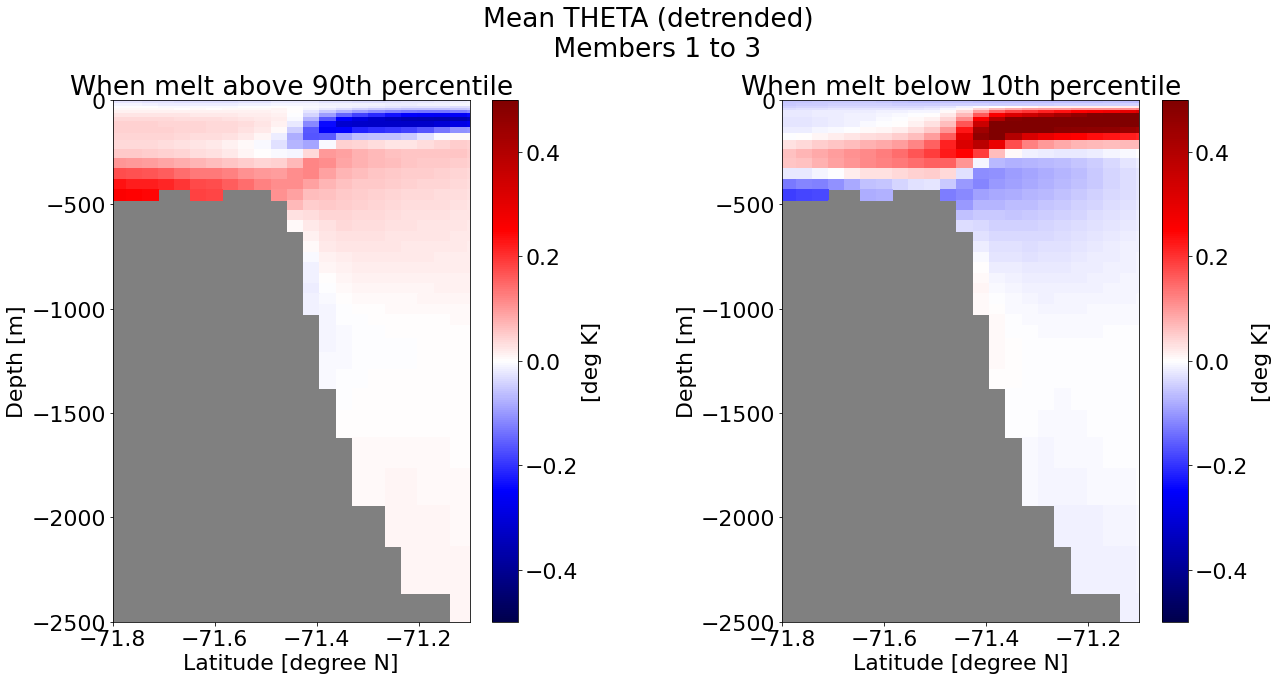

In [43]:
lon=115
Smean1=Smean1.where(Smean1!=0, drop=True)
Smean2=Smean2.where(Smean2!=0, drop=True)

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(20,10))
plt.suptitle('Mean THETA (detrended) \n Members 1 to 3')
ax=plt.subplot(1,2,1)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
#plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.ice_mask[grid.lat_1d<-70,:], cmap='cool', vmax=1.5)

Q=plt.pcolor(Smean1.YC, Smean1.Z, Smean1, cmap='seismic', vmin=-0.5, vmax=0.5)
#qk = ax.quiverkey(Q, 0.9, 0.9, 0.1, r'$0.1 \frac{m}{s}$', labelpos='E',
#                   coordinates='figure')
if lon==115:
    ax.set_xlim([-71.8, -71.1])
elif lon==123:
    ax.set_xlim([-73, -72])
ax.set_ylim([-2500, 0])
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Latitude [degree N]')
ax.set_facecolor('grey')
plt.title('When melt above 90th percentile')
plt.colorbar(label='[deg K]')
#plt.ylim([-75.5, -70])

ax=plt.subplot(1,2,2)
#plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
Q=plt.pcolor(Smean2.YC, Smean2.Z, Smean2, cmap='seismic', vmin=-0.5, vmax=0.5)
plt.title('When melt below 10th percentile')
if lon==115:
    ax.set_xlim([-71.8, -71.1])
elif lon==123:
    ax.set_xlim([-73, -72])
ax.set_ylim([-2500, 0])
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Latitude [degree N]')
ax.set_facecolor('grey')
plt.colorbar(label='[deg K]')

from datetime import date
today = date.today()
today=today.strftime("%Y%m%d")

#plt.ylim([-75.5, -70])
plt.subplots_adjust(top=0.85, wspace=0.5)
#plt.savefig('../03_output/other/'+today+'_mean_flow_direction_versus_melt_baroclinic_1-3.png')



In [44]:
#High melt; low melt: wind forcing?
data=loadMITgcmData(filename='EXFuwind', members=[0,3], kind='maps')
melt=loadTimeSeriesData(filename='timeseries_final', members=[0,3], kind='old')['dotson_to_cosgrove_massloss']
from functions.loading_and_processing_data import loadMITgcmData, loadTimeSeriesData, detrend_and_average_MITgcmData
melt_dt=detrend_and_average_MITgcmData(melt.to_dataset(name='melt'), var='melt')
data_dt=detrend_and_average_MITgcmData(data, var='EXFuwind')
meltrm=melt_dt.sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean()
Smean1=data_dt.where(meltrm>meltrm.quantile(0.9)).mean(dim=['time', 'ens'])
Smean2=data_dt.where(meltrm<meltrm.quantile(0.1)).mean(dim=['time', 'ens'])

Loading number:0
../02_data/maps/EXFuwind_ens1.nc
Loading number:1
../02_data/maps/EXFuwind_ens2.nc
Loading number:2
../02_data/maps/EXFuwind_ens3.nc
Loading number:0
../data/timeseries_final_PACE01.nc
Loading number:1
../data/timeseries_final_PACE02.nc
Loading number:2
../data/timeseries_final_PACE03.nc


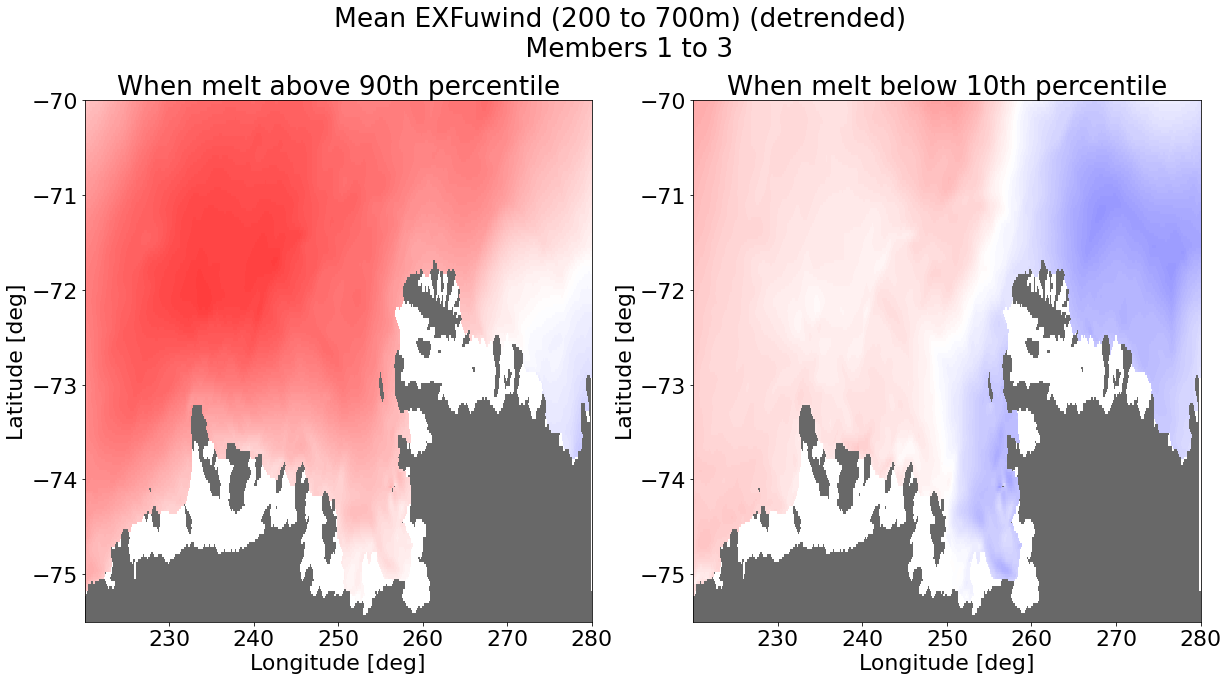

In [45]:
#step1=2
#step2=4
#scale=2

Smean1=Smean1.where(Smean1!=0, drop=True)
Smean2=Smean2.where(Smean2!=0, drop=True)

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(20,10))
plt.suptitle('Mean EXFuwind (200 to 700m) (detrended) \n Members 1 to 3')
ax=plt.subplot(1,2,1)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
#plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.ice_mask[grid.lat_1d<-70,:], cmap='cool', vmax=1.5)

Q=plt.pcolor(Smean1.XC, Smean1.YC, Smean1, cmap='seismic', vmin=-0.5, vmax=0.5)
#qk = ax.quiverkey(Q, 0.9, 0.9, 0.1, r'$0.1 \frac{m}{s}$', labelpos='E',
#                   coordinates='figure')
plt.title('When melt above 90th percentile')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
plt.ylim([-75.5, -70])

ax=plt.subplot(1,2,2)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
Q=plt.pcolor(Smean2.XC, Smean2.YC, Smean2, cmap='seismic', vmin=-0.5, vmax=0.5)
plt.title('When melt below 10th percentile')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')

from datetime import date
today = date.today()
today=today.strftime("%Y%m%d")

plt.ylim([-75.5, -70])
plt.subplots_adjust(top=0.85)
#plt.savefig('../03_output/other/'+today+'_mean_flow_direction_versus_melt_baroclinic_1-3.png')



In [46]:
#High melt; low melt: wind forcing?
data=loadMITgcmData(filename='EXFvwind', members=[0,3], kind='maps')
melt=loadTimeSeriesData(filename='timeseries_final', members=[0,3], kind='old')['dotson_to_cosgrove_massloss']
from functions.loading_and_processing_data import loadMITgcmData, loadTimeSeriesData, detrend_and_average_MITgcmData
melt_dt=detrend_and_average_MITgcmData(melt.to_dataset(name='melt'), var='melt')
data_dt=detrend_and_average_MITgcmData(data, var='EXFvwind')
meltrm=melt_dt.sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean()
Smean1=data_dt.where(meltrm>meltrm.quantile(0.9)).mean(dim=['time', 'ens'])
Smean2=data_dt.where(meltrm<meltrm.quantile(0.1)).mean(dim=['time', 'ens'])

Loading number:0
../02_data/maps/EXFvwind_ens1.nc
Loading number:1
../02_data/maps/EXFvwind_ens2.nc
Loading number:2
../02_data/maps/EXFvwind_ens3.nc
Loading number:0
../data/timeseries_final_PACE01.nc
Loading number:1
../data/timeseries_final_PACE02.nc
Loading number:2
../data/timeseries_final_PACE03.nc


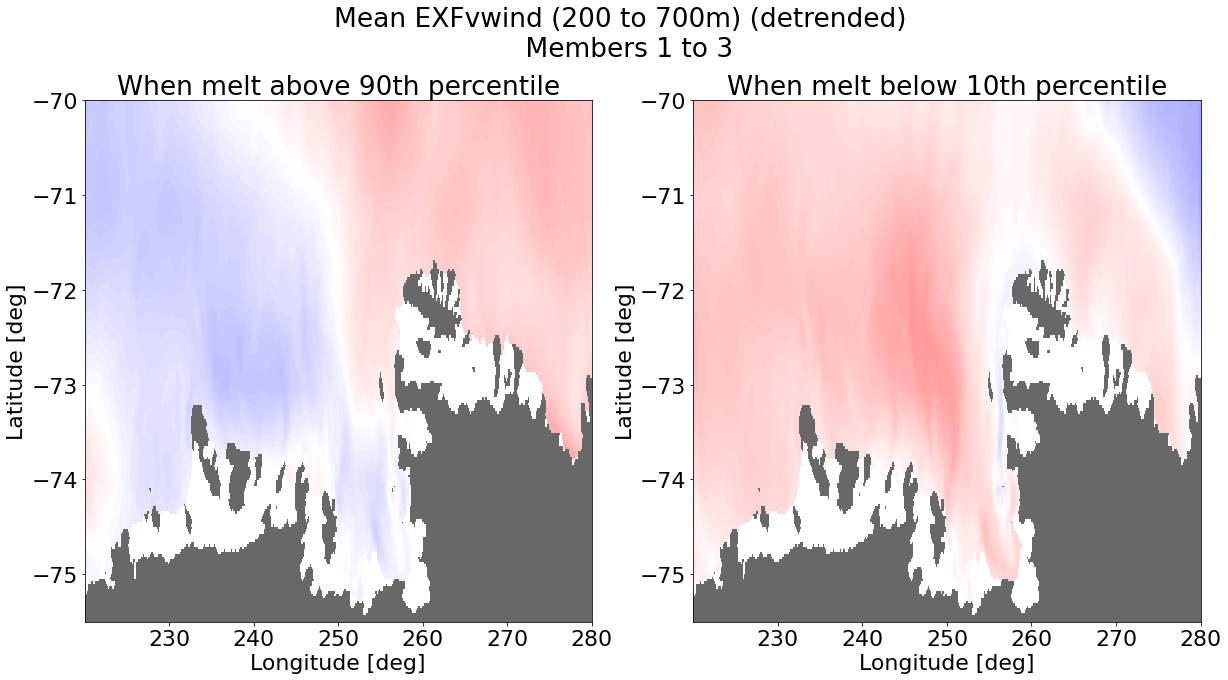

In [47]:
Smean1=Smean1.where(Smean1!=0, drop=True)
Smean2=Smean2.where(Smean2!=0, drop=True)

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(20,10))
plt.suptitle('Mean EXFvwind (200 to 700m) (detrended) \n Members 1 to 3')
ax=plt.subplot(1,2,1)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
#plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.ice_mask[grid.lat_1d<-70,:], cmap='cool', vmax=1.5)

Q=plt.pcolor(Smean1.XC, Smean1.YC, Smean1, cmap='seismic', vmin=-0.5, vmax=0.5)
#qk = ax.quiverkey(Q, 0.9, 0.9, 0.1, r'$0.1 \frac{m}{s}$', labelpos='E',
#                   coordinates='figure')
plt.title('When melt above 90th percentile')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
plt.ylim([-75.5, -70])

ax=plt.subplot(1,2,2)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
Q=plt.pcolor(Smean2.XC, Smean2.YC, Smean2, cmap='seismic', vmin=-0.5, vmax=0.5)
plt.title('When melt below 10th percentile')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')

from datetime import date
today = date.today()
today=today.strftime("%Y%m%d")

plt.ylim([-75.5, -70])
plt.subplots_adjust(top=0.85)
#plt.savefig('../03_output/other/'+today+'_mean_flow_direction_versus_melt_baroclinic_1-3.png')

In [55]:
#High melt; low melt: wind forcing?
data=loadMITgcmData(filename='EXFvwind', members=[0,3], kind='maps')
melt=loadTimeSeriesData(filename='timeseries_final', members=[0,3], kind='old')['dotson_to_cosgrove_massloss']
from functions.loading_and_processing_data import loadMITgcmData, loadTimeSeriesData, detrend_and_average_MITgcmData
melt_dt=detrend_and_average_MITgcmData(melt.to_dataset(name='melt'), var='melt')
data_dt=detrend_and_average_MITgcmData(data, var='EXFvwind')
meltrm=melt_dt.sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean()
Vmean1=data_dt.cumsum(dim='time').where(meltrm>meltrm.quantile(0.9)).mean(dim=['time', 'ens'])
Vmean2=data_dt.cumsum(dim='time').where(meltrm<meltrm.quantile(0.1)).mean(dim=['time', 'ens'])

Loading number:0
../02_data/maps/EXFvwind_ens1.nc
Loading number:1
../02_data/maps/EXFvwind_ens2.nc
Loading number:2
../02_data/maps/EXFvwind_ens3.nc
Loading number:0
../data/timeseries_final_PACE01.nc
Loading number:1
../data/timeseries_final_PACE02.nc
Loading number:2
../data/timeseries_final_PACE03.nc


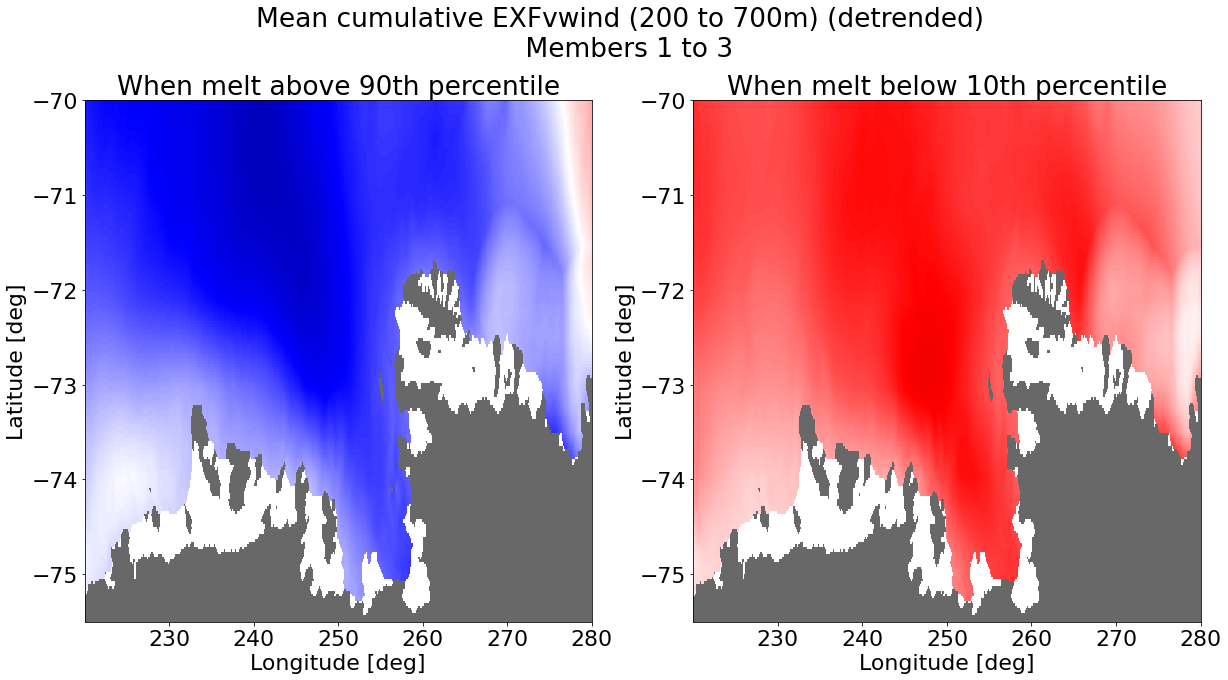

In [58]:
Vmean1=Vmean1.where(Vmean1!=0, drop=True)
Vmean2=Vmean2.where(Vmean2!=0, drop=True)

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(20,10))
plt.suptitle('Mean cumulative EXFvwind (200 to 700m) (detrended) \n Members 1 to 3')
ax=plt.subplot(1,2,1)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
#plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.ice_mask[grid.lat_1d<-70,:], cmap='cool', vmax=1.5)

Q=plt.pcolor(Vmean1.XC, Vmean1.YC, Vmean1, cmap='seismic', vmin=-20, vmax=20)
#qk = ax.quiverkey(Q, 0.9, 0.9, 0.1, r'$0.1 \frac{m}{s}$', labelpos='E',
#                   coordinates='figure')
plt.title('When melt above 90th percentile')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
plt.ylim([-75.5, -70])

ax=plt.subplot(1,2,2)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
Q=plt.pcolor(Vmean2.XC, Vmean2.YC, Vmean2, cmap='seismic', vmin=-20, vmax=20)
plt.title('When melt below 10th percentile')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')

from datetime import date
today = date.today()
today=today.strftime("%Y%m%d")

plt.ylim([-75.5, -70])
plt.subplots_adjust(top=0.85)
#plt.savefig('../03_output/other/'+today+'_mean_flow_direction_versus_melt_baroclinic_1-3.png')

In [50]:
#High melt; low melt: wind forcing?
data=loadMITgcmData(filename='EXFuwind', members=[0,3], kind='maps')
melt=loadTimeSeriesData(filename='timeseries_final', members=[0,3], kind='old')['dotson_to_cosgrove_massloss']
from functions.loading_and_processing_data import loadMITgcmData, loadTimeSeriesData, detrend_and_average_MITgcmData
melt_dt=detrend_and_average_MITgcmData(melt.to_dataset(name='melt'), var='melt')
data_dt=detrend_and_average_MITgcmData(data, var='EXFuwind')
meltrm=melt_dt.sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean()
Smean1=data_dt.cumsum(dim='time').where(meltrm>meltrm.quantile(0.9)).mean(dim=['time', 'ens'])
Smean2=data_dt.cumsum(dim='time').where(meltrm<meltrm.quantile(0.1)).mean(dim=['time', 'ens'])

Loading number:0
../02_data/maps/EXFuwind_ens1.nc
Loading number:1
../02_data/maps/EXFuwind_ens2.nc
Loading number:2
../02_data/maps/EXFuwind_ens3.nc
Loading number:0
../data/timeseries_final_PACE01.nc
Loading number:1
../data/timeseries_final_PACE02.nc
Loading number:2
../data/timeseries_final_PACE03.nc


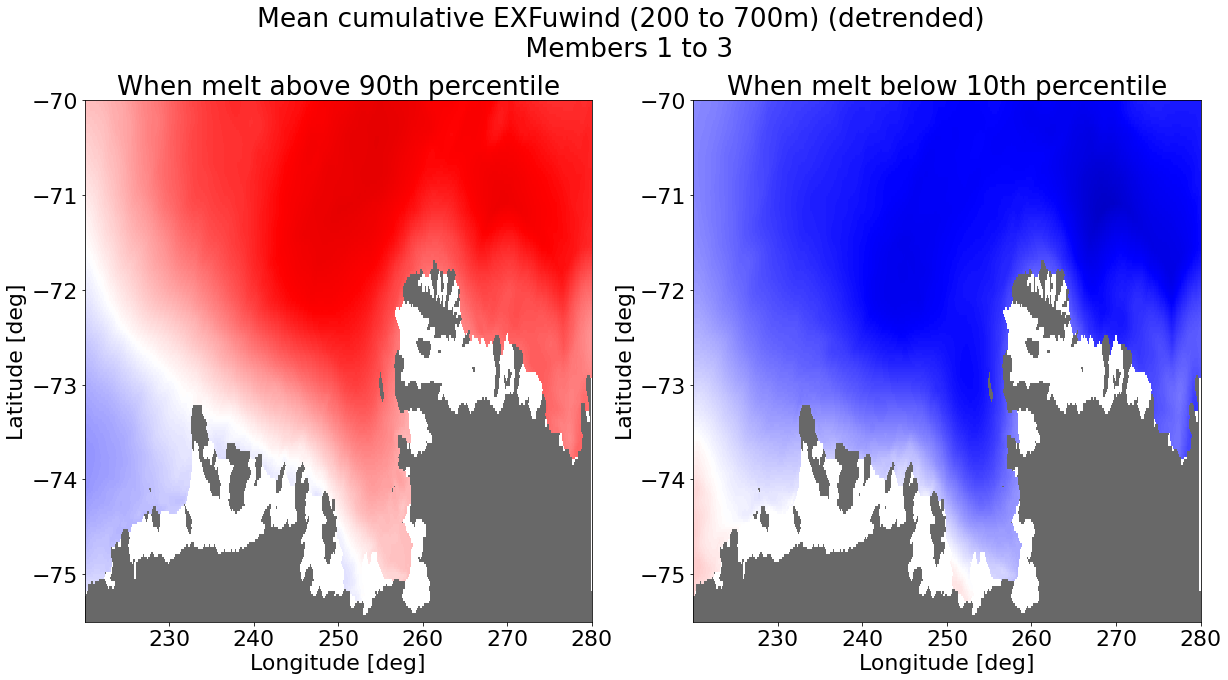

In [54]:
Smean1=Smean1.where(Smean1!=0, drop=True)
Smean2=Smean2.where(Smean2!=0, drop=True)

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(20,10))
plt.suptitle('Mean cumulative EXFuwind (200 to 700m) (detrended) \n Members 1 to 3')
ax=plt.subplot(1,2,1)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
#plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.ice_mask[grid.lat_1d<-70,:], cmap='cool', vmax=1.5)

Q=plt.pcolor(Smean1.XC, Smean1.YC, Smean1, cmap='seismic', vmin=-20, vmax=20)
#qk = ax.quiverkey(Q, 0.9, 0.9, 0.1, r'$0.1 \frac{m}{s}$', labelpos='E',
#                   coordinates='figure')
plt.title('When melt above 90th percentile')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
plt.ylim([-75.5, -70])

ax=plt.subplot(1,2,2)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
Q=plt.pcolor(Smean2.XC, Smean2.YC, Smean2, cmap='seismic', vmin=-20, vmax=20)
plt.title('When melt below 10th percentile')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')

from datetime import date
today = date.today()
today=today.strftime("%Y%m%d")

plt.ylim([-75.5, -70])
plt.subplots_adjust(top=0.85)
#plt.savefig('../03_output/other/'+today+'_mean_flow_direction_versus_melt_baroclinic_1-3.png')